<a href="https://colab.research.google.com/github/JP2821/APM/blob/main/ProjetoAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Previsão usando diferentes algoritmos** 🤯
---


## **Alunos**:
* Caio Fazio cfa5@cin.ufpe.br
* João Pedro Ribeiro da Silva Dias - jprsd@cin.ufpe.br
* Rodrigo Santos Batista – rsb6@cin.ufpe.br


CIn ­ UFPE

## **Projeto**:

Modelo preditivo com:
- **Árvore de decisão**
- **Bayesiano ingenuo**
- **Regressão logística**
- **K-vizinhos**

## **Professor**:

Francisco de Assis Tenorio de Carvalho

CIn ­ UFPE


## **Import the data-base**

---




In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')



from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/Aprendizado de máquina/wdbc.data')




names = ['ID','Diagnosis','radius1','texture1','perimeter1','area1',
               'smoothness1','compactness1','concavity1','concave_points1',
               'symmetry1','fractal_dimension1','radius2','texture2',
               'perimeter2','area2','smoothness2','compactness2','concavity2',
               'concave_points2','symmetry2','fractal_dimension2','radius3',
               'texture3','perimeter3','area3','smoothness3','compactness3',
               'concavity3','concave_points3','symmetry3','fractal_dimension3']

# Processo de nomeação das colunas
df0.columns = ['ID','Diagnosis','radius1','texture1','perimeter1','area1',
               'smoothness1','compactness1','concavity1','concave_points1',
               'symmetry1','fractal_dimension1','radius2','texture2',
               'perimeter2','area2','smoothness2','compactness2','concavity2',
               'concave_points2','symmetry2','fractal_dimension2','radius3',
               'texture3','perimeter3','area3','smoothness3','compactness3',
               'concavity3','concave_points3','symmetry3','fractal_dimension3']



# creating features and label
X = df0.drop('Diagnosis', axis=1)  # Recursos (excluindo a coluna 'Diagnosis')

# Variável target (a ser prevista)
y = df0['Diagnosis']  # Variável alvo (coluna 'Diagnosis')


# por que test_size = 0.3, pelo fato de que isso nos dá 70% da base para treino
# e 30% para test como pedido nas especificações
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## **Análise Exploratória de Dados (AED)**

In [ ]:
# Redefinindo Diagnosis de M-1 de B-0
df0.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:

A = '# Cria o modelo passado como parametro'
A.upper()

'# CRIA O MODELO PASSADO COMO PARAMETRO'

## **Utils**


---



In [ ]:
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.exceptions import UndefinedMetricWarning

# Ignorar os avisos específicos
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)


# PARA REMOVER AS FEATURES ALTAMENTE CORRELACIONADAS COM O LIMITE DE CORRELAÇÃO DE 0.92:
def remove_highly_correlated_features(df, correlation_threshold=0.92):
    # Calcula a matriz de correlação
    corr_matrix = df.corr().abs()

    # Cria uma máscara triangular superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Aplica a máscara para criar a matriz de correlação triangular
    tri_df = corr_matrix.mask(mask)

    # Encontra as colunas com correlação acima do limite
    to_drop = [col for col in tri_df.columns if any(tri_df[col] > correlation_threshold)]

    # Remove as colunas altamente correlacionadas do DataFrame
    df = df.drop(to_drop, axis=1)
    return df




# NORMALIZA OS DADOS PARA PRODUZIOR RESULTADOS MAIS CONSISTENTES
def data_preprocess(X_data,y_data, df0):
  from sklearn.preprocessing import StandardScaler

  # Agora 'df0' conterá o DataFrame após a remoção das colunas altamente correlacionadas.
  df0 = remove_highly_correlated_features(df0, correlation_threshold=0.92)
  # divide os dados em um conjunto de treinamento e um conjunto de teste.
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data.values.ravel(), test_size=0.3, random_state=42)

  # padroniza as variáveis preditoras, transformando-as em média zero e variância unitária
  # Isso ajuda a evitar que uma variável com uma escala maior tenha mais influência
  # no modelo do que as outras variáveis.
  scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

  # ajusta o scaler no conjunto de treinamento usando o método "fit"
  '''
   o ajuste é necessário para que a normalização dos dados seja feita
   corretamente no conjunto de treinamento, permitindo que o modelo
   generalize bem em novos dados.

  '''
  scaler.fit(X_train)

  # Agora aplica as transformações aos dados:
  # É feita para que que as variáveis tenham mesma escala e a mesma ordem de grandeza.
  train_scaled = scaler.transform(X_train)
  test_scaled = scaler.transform(X_test)
  return(train_scaled, test_scaled, y_train, y_test)


# PLOTA A MATRIZ DE CONFUSÃO DOS DADOS DE TESTE E TREINO
def getResults(x_test, y_test, model, model_name='arv'):
  '''
  Args:
    x: pode ser x_test ou x_train
    y: pode ser y_test ou y_train
    model: modelo de treinamento que o conjunto de dados esta sendo submetido
    model_name: nome do modelo para visualizar a matrix de confusão
      ->'arv'    : árvore de decisão
      ->'baysian': Baysiano ingênuo
      ->'reglog' : Regressão logística
      ->'kviz"   : K-vizinhos

  Returns:
    Matrix de confusão do modelo passado

  '''

  def get_model(model_name):
    print("Modelo:", model_name)
    predicted = model.predict(x_test)
    print("Acurácia:", accuracy_score(y_test, predicted), "\n")

    # Matriz de Confusão
    cm = confusion_matrix(y_test, predicted)
    TP = cm[0][0] # True positive
    FP = cm[0][1] # False positive
    FN = cm[1][0] # False negative
    TN = cm[1][1] # True negative

    # Calculation of accuracy ( for to query effect)
    accuracy =  (TP + TN)/(TP + FP + FN + TN)

    labels = ['M = malignant','B = benign']

    plt.figure()
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', center=True)
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    plt.show()

    # Relatório de Classificação
    class_report = classification_report(y_test, predicted)
    print("\n############___Relatório de Classificação___############:\n")
    print(class_report)
    print("\n-------------------------------------------------------\n")


  if model_name == 'arv':
    name = "Árvore de Decisão"
    get_model(name)

  elif model_name == 'baysian':
    name = "Bayesiano Ingênuo"
    get_model(name)

  elif model_name == 'reglog':
    name = "Regressão Logística"
    get_model(name)

  elif model_name == 'kviz':
    name = "K-vizinhos"
    get_model(name)

  else:
    print("Unknow model\n")



# MOSTRA O BALANCEAMENTO DO TARGET EM RELAÇÃO AO CONJUNTO DE DADOS
def showBalance(target="Diagnosis"):
  import seaborn as sns
  # Definindo cores para as barras
  colors = ["skyblue", "salmon"]

  # plt.figure(figsize=(8, 4))
  sns.countplot(data=df0, x=target, palette=colors)



  # Adicionando títulos
  plt.title("Número de casos Benigno e Maligno")
  plt.xlabel("Diagnóstico")
  plt.ylabel("Contagem")

  plt.show()


# BALECEIA DOS DADOS DE TREINO DO CONJUNTO DE DADOS PARA GARANTIR QUE O MODELO ESTÁ PERFORMANDO BEM
def cross_validation(model, X, y, oversampling=False):
  # Kfold do scikit-Learn
  from sklearn.model_selection import KFold
  from sklearn.metrics import accuracy_score
  from imblearn.over_sampling import SMOTE

  from statistics import mean


  # Returns the number of splitting iterations in the cross-validator
  kfold = KFold(n_splits=10)


  #listas de acurácias de cada split:
  accuracy_split = []

  # Iterando sobre os splits
  for idx, (idx_train, idx_validation) in enumerate(kfold.split(X)):
    X_split_train = X.iloc[idx_train, :]
    y_split_train = y.iloc[idx_train]

    # Oversample só no split de treine:
    if oversampling:
      sm = SMOTE(random_state=42)
      #balanceamento no treino
      X_split_train, y_split_train = sm.fit_resample(X_split_train, y_split_train)

    # Treinando modelo com dados balaceado só no treino
    model.fit(X_split_train, y_split_train.values.flatten())

    # Não aplicamo SMOT na validação
    X_split_validation = X.iloc[idx_validation, :]
    y_split_validation = y.iloc[idx_validation]

    #Validação SEM oversample (AMOSTRA com dados desbalanceados)
    predict_validation = model.predict(X_split_validation)

    accuracy = accuracy_score(y_split_validation, predict_validation)
    accuracy_split.append(accuracy)

    print(f"Accuracy do split {idx}: {accuracy}")

  return mean(accuracy_split)


# CRIA O MODELO PASSADO COMO PARAMETRO
def models(X_train, Y_train, model='reglog', n_neighbors=5):
  '''
  Args:
    x: x_train dados de treino
    y: y_train dados de treino
    model: modelo de treinamento que o conjunto de dados esta sendo submetido
      ->'arv'    : árvore de decisão
      ->'baysian': Baysiano ingênuo
      ->'reglog' : Regressão logística
      ->'kviz"   : K-vizinhos

  Returns:
    Modelo treinado com um dos algoritmos passados
  '''

  if model == 'reglog':
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train, Y_train)
    print('Logistic Regression Training Accuracy : ',log.score(X_train, Y_train))
    return log

  elif model == 'arv':
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(X_train, Y_train)
    print('Decision Tree Training Accuracy : ',tree.score(X_train, Y_train))
    return tree

  elif  model == 'baysian':
    #Naive Bayesian
    from sklearn.naive_bayes import GaussianNB
    baysian = GaussianNB()
    baysian.fit(X_train, Y_train)
    print('Naive Bayesian Training Accuracy : ',baysian.score(X_train, Y_train))
    return baysian


  elif model == 'kviz':
    # K-neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)  # Defina o número de vizinhos (k) conforme necessário
    knn.fit(X_train, y_train)
    print('K-neighbors Training Accuracy : ',knn.score(X_train, Y_train))
    return knn

  else:
    return ValueError("unknown type algoritme \n")



## **Árvore de decisão**

---




#### **O modelo árvore de decisão**
A árvore de decisão é um algoritmo de aprendizado de máquina que cria uma estrutura de árvore para fazer decisões com base nas características dos dados. O algoritmo pode ser usado tanto para problemas de classificação quanto de regressão.


1. **Entropia:**
A entropia é uma medida da impureza do conjunto de dados. Em um contexto de classificação binária, a entropia é calculada para o conjunto de dados S em relação à classe-alvo binária {0, 1}.

   Fórmula da entropia:
   $$ Entropia(S) = -p_1 \log_2(p_1) - p_0 \log_2(p_0) $$

   onde:
   - $p_1$ é a proporção de amostras da classe positiva (1) em S.
   - $p_0$ é a proporção de amostras da classe negativa (0) em S.


2. **Ganho de Informação:**
O ganho de informação é usado para avaliar a importância de um atributo para dividir os dados em um nó. Quanto maior o ganho de informação, mais informativo é o atributo.

   Fórmula do ganho de informação:
   $$ Ganho(S, A) = Entropia(S) - \sum_{v \in valores(A)} \dfrac{|S_v|}{|S|} \cdot Entropia(S_v) $$

   onde:
   - $A$ é um atributo em relação ao qual queremos calcular o ganho.
   - $S$ é o conjunto de dados no nó atual.
   - $valores(A)$ é o conjunto de valores possíveis do atributo A.
   - $S_v$ é o subconjunto de dados onde o atributo A tem valor v.


3. **Algoritmo de Construção da Árvore de Decisão:**

   - Inicialmente, a árvore começa com um nó raiz que contém todo o conjunto de dados de treinamento.
   - O algoritmo seleciona o melhor atributo (aquele que possui o maior ganho de informação) para dividir o conjunto de dados no nó atual.
   - A árvore é dividida em ramos correspondentes aos diferentes valores do atributo selecionado.
   - O algoritmo repete o processo em cada nó filho (subconjunto de dados) até que uma condição de parada seja atingida (por exemplo, profundidade máxima da árvore, número mínimo de amostras em um nó, etc.).
   - Para problemas de classificação, o nó folha é atribuído à classe majoritária do conjunto de dados correspondente.
   - Para problemas de regressão, o nó folha é atribuído à média ou mediana dos rótulos do conjunto de dados correspondente.
   

#### **Ajustes no Treinamento**

Métricas de avaliação:
As métricas de avaliação ajudam a medir o desempenho do modelo de árvore de decisão em relação aos dados de teste. Algumas das métricas comuns são:

1. Acurácia: A acurácia mede a proporção de previsões corretas em relação ao número total de amostras. É útil para problemas de classificação.

2. Erro absoluto médio (MAE): O MAE mede a média das diferenças absolutas entre as previsões do modelo e os valores reais. É útil para problemas de regressão.

3. Erro quadrático médio (MSE): O MSE mede a média dos quadrados das diferenças entre as previsões do modelo e os valores reais. É outra métrica comumente usada para problemas de regressão.

4. Raiz do erro quadrático médio (RMSE): O RMSE é simplesmente a raiz quadrada do MSE e também é usado em problemas de regressão.

5. Curva ROC e Área sob a curva (AUC-ROC): São métricas usadas para problemas de classificação binária, que ajudam a medir a capacidade do modelo de distinguir entre as duas classes. A curva ROC (Receiver Operating Characteristic) é um gráfico da taxa de verdadeiros positivos (TPR) em função da taxa de falsos positivos (FPR) à medida que o limite de decisão do modelo é variado. A AUC-ROC é a área sob essa curva e varia de 0 a 1, sendo 1 indicativo de um modelo perfeito.

6. Precisão, Recall e F1-Score: São métricas úteis para problemas de classificação binária. A precisão mede a proporção de verdadeiros positivos em relação ao número total de previsões positivas do modelo. O recall mede a proporção de verdadeiros positivos em relação ao número total de amostras positivas. O F1-Score é a média harmônica entre precisão e recall.

Essas são apenas algumas das métricas de avaliação disponíveis para o modelo de árvore de decisão. A escolha da métrica apropriada depende do tipo de problema (classificação ou regressão) e dos requisitos específicos do projeto.


### **Aplicando regressão sem pré-processamento**
 Hirperparametros padrão:

In [ ]:
# Árvore de Decisão
dt_clf = DecisionTreeClassifier() #critério que o algorimo está usando entropia
dt_clf.fit(X_train, y_train)

dt_predictions = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Acurácia (Árvore de Decisão):", dt_accuracy)

Acurácia (Árvore de Decisão): 0.9239766081871345


#### **Conjunto de teste**

---



Modelo: Árvore de Decisão
Acurácia: 0.9239766081871345 



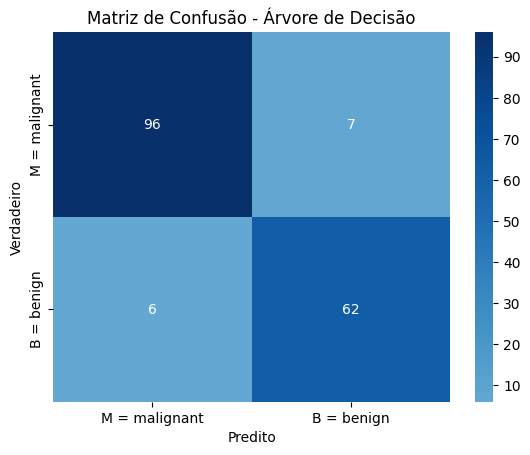


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       0.94      0.93      0.94       103
           M       0.90      0.91      0.91        68

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171


-------------------------------------------------------



In [ ]:
# Matriz de confusão para o conjunto de teste
getResults(X_test, y_test, dt_clf, model_name='arv')

#### **Conjunto de treino**

---



Modelo: Árvore de Decisão
Acurácia: 1.0 



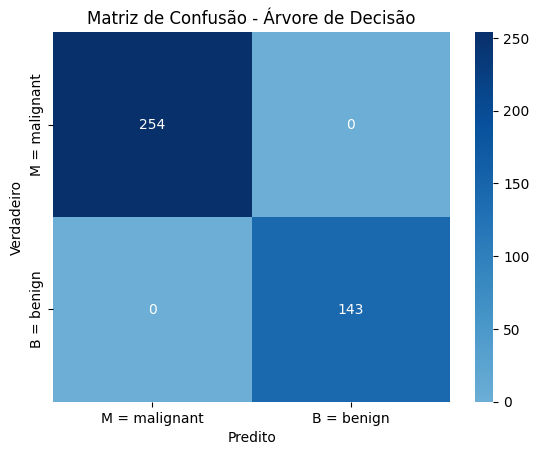


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       254
           M       1.00      1.00      1.00       143

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397


-------------------------------------------------------



In [ ]:
# Matriz de confusão para o conjunto de teste
getResults(X_train, y_train, dt_clf, model_name='arv')

#### **Aplicando Oversampling no conjunto de treino**

---

In [ ]:
mean_accuracy_without_smote = cross_validation(dt_clf, X_train, y_train)
print(mean_accuracy_without_smote)
print()
mean_accuracy_with_smote = cross_validation(dt_clf, X_train, y_train, oversampling=True)
mean_accuracy_with_smote

Accuracy do split 0: 0.975
Accuracy do split 1: 0.9
Accuracy do split 2: 0.925
Accuracy do split 3: 0.925
Accuracy do split 4: 0.925
Accuracy do split 5: 0.825
Accuracy do split 6: 0.875
Accuracy do split 7: 0.9230769230769231
Accuracy do split 8: 0.9743589743589743
Accuracy do split 9: 0.9487179487179487
0.9196153846153846

Accuracy do split 0: 0.95
Accuracy do split 1: 0.9
Accuracy do split 2: 0.95
Accuracy do split 3: 0.925
Accuracy do split 4: 0.9
Accuracy do split 5: 0.9
Accuracy do split 6: 0.875
Accuracy do split 7: 0.9230769230769231
Accuracy do split 8: 1.0
Accuracy do split 9: 1.0


0.9323076923076923

Árvore de decisão é um algoritmo de aprendizado de máquina supervisionado utilizado para modelar problemas de classificação e regressão. É uma técnica de análise preditiva que utiliza uma estrutura de árvore para representar um conjunto de decisões e suas possíveis consequências.

A árvore de decisão é construída a partir de um conjunto de dados de treinamento, onde cada exemplo é caracterizado por um conjunto de atributos e uma classe correspondente. A árvore é construída recursivamente, dividindo o conjunto de dados em subconjuntos menores com base em determinados critérios, até que os subconjuntos sejam o mais puro possível em relação à classe de destino.

Uma vez construída a árvore, ela pode ser usada para classificar novos exemplos, seguindo o caminho correspondente na árvore com base nos seus atributos. As árvores de decisão são amplamente utilizadas em áreas como análise de dados, reconhecimento de padrões, diagnóstico médico e tomada de decisão empresarial

### **Aplicando regressão com pré-processamento**
 Hirperparametros modificados:

In [ ]:
# dados normalizados
train_scaled, test_scaled, y_train_scaled, y_test_scaled = data_preprocess(X, y)

#### **Conjunto de treino**

---



In [ ]:
arv = DecisionTreeClassifier(max_depth=5, criterion='entropy') #critério que o algorimo está usando entropia
arv.fit(train_scaled, y_train_scaled);
score = arv.score(train_scaled, y_train_scaled)
print(f'Accuracy no conjunto de treino: {score:.5f}')

Accuracy no conjunto de treino: 1.00000


Modelo: Árvore de Decisão
Acurácia: 1.0 



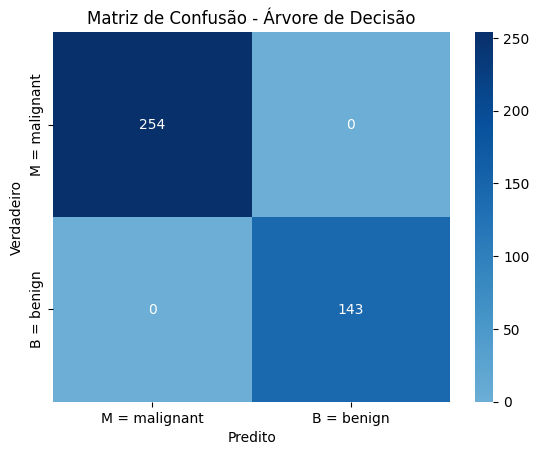


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       254
           M       1.00      1.00      1.00       143

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397


-------------------------------------------------------



In [ ]:
getResults(train_scaled, y_train_scaled, arv, model_name='arv')

#### **Conjunto de teste**

---



In [ ]:
arv = DecisionTreeClassifier(max_depth=5, criterion='entropy') #critério que o algorimo está usando entropia
arv.fit(test_scaled, y_test_scaled);
score = arv.score(test_scaled, y_test_scaled)
print(f'Accuracy no conjunto de treino: {score:.5f}')

Accuracy no conjunto de treino: 0.98830


Modelo: Árvore de Decisão
Acurácia: 0.9883040935672515 



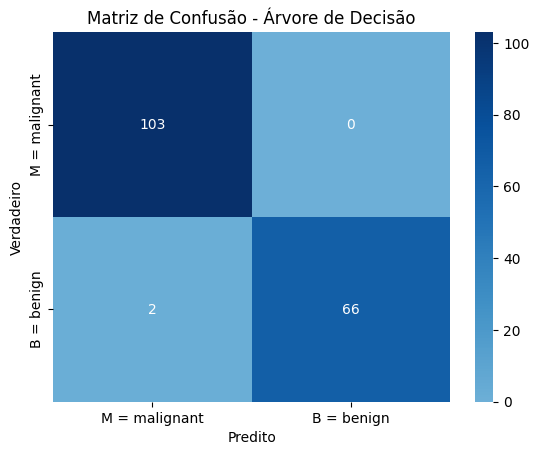


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       103
           M       1.00      0.97      0.99        68

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


-------------------------------------------------------



In [ ]:
getResults(test_scaled, y_test_scaled, arv, model_name='arv')

## **Bayesiano ingenuo**

---





## **Regressão logística**

---




O processo de treinamento do modelo de regressão logística envolve a utilização de um conjunto de dados de treinamento, do kaggle, que inclui informações sobre a ocorrência câncer a partir de 31 variáveis ​​explicativas associadas a cada indivíduo. O modelo é ajustado aos dados de treinamento e, em seguida, é avaliado usando um conjunto de dados de teste separado para verificar a precisão das previsões.

A linguagem de programação Python será usada para implementar esse modelo de regressão logística. A biblioteca Scikit-learn será a principal ferramenta que será usada para prover as previsões.

O método de regressão logistica será usado como técnica para dizer se o modelo converge ou diverge, baseado no conjunto de dados fornecido, que consite em um **método linear generalizado (MLG)**.

> Nelder, John; Wedderburn, Robert (1972). Generalized Linear Models. Blackwell Publishing. Journal of the Royal Statistical Society. Series A (General). 135: 370–384. JSTOR 2344614. doi:10.2307/2344614

Os MLGs propõem a modelagem para variáveis na família exponencial de distribuições, que inclui:

* Binomial (Bernoulli) [link](https://www.laboneconsultoria.com.br/distribuicao-binomial/)
* Poisson [link](https://www.scribbr.com/statistics/poisson-distribution/)
* Normal [link](https://en.wikipedia.org/wiki/Normal_distribution)
* Binomial Negativa [link](https://en.wikipedia.org/wiki/Negative_binomial_distribution)
* Gama  [link](https://en.wikipedia.org/wiki/Gamma_distribution)
* Gaussiana Inversa [link](https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution)
* outras


#### **O modelo de regressão logística:**

Um dos modelos lineares mais utilizados é o modelo de regressão logística.

Neste modelo, consideramos

$$ Y_i = \left \{ \begin{matrix} 1, & \mbox{se }\mbox{ o indivíduo i possui determinada característica} \\ 0, & \mbox{se }\mbox{ caso contrário} \end{matrix} \right. $$

Supondo que $$P(X_i|Y_i) = π(X_i)$$ e que $$log\left ( \dfrac{π(x)}{1-π(x)} \right ) = α + βx $$

e queremos estimar os parâmetros $α$ e $β$ para compreender como $X_i$ e $Y_i$ estão associados.

Suponha que $X_i = 1$ indique que o indivíduo $i$ possui um fator de risco para um a dor nas costas (indicada por $Y_i = 1)$
e foram observados $n_1$ indivíduos com a presença deste fator, e $n_2$ indivíduos sem a presença deste fator ($X_i = 0)$
.

Para os indivíduos que possuiam o fator, a chance de desenvolvimento da doença fica:

$$\left ( \dfrac{π(1)}{1-π(1)} \right ) = e^{(α + βx)} $$

enquanto que a chance de desenvolvimento da doença no indivíduo com ausência do fator é

$$\left ( \dfrac{π(0)}{1-π(0)} \right ) = e^{α} $$

A razão de chances nesse caso fica

$$  ϕ =  \dfrac{π(1)/(1-π(1))}{π(0)/(1-π(0))} = e^{β} $$




Portanto, são esses parametros e equações que estarão abstraidos no modelo

#### **A qualidade do ajuste**


A qualidade do ajuste pode ser avaliada com

* [Análise de diagnóstico](https://datascience.eu/pt/aprendizado-de-maquina/entendendo-a-curva-auc-roc)*
* [Resíduos ordinários](https://www.freecodecamp.org/portuguese/news/tipos-de-dados-em-estatistica-tipos-de-dados-nominais-ordinais-intervalares-e-proporcionais-explicados-com-exemplos/),
* [Resíduos studentizados](https://storopoli.github.io/Estatistica/7-Regressao_Logistica.html),
* [Pontos de alavanca](https://pt.wikipedia.org/wiki/Ponto_de_alavanca_(estat%C3%ADstica)),
* [Distância de Cook](https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_de_Cook)
* Envelopes para os resíduos ([disponível em R )](https://www.ime.usp.br/~giapaula)
* Deviance [(função desvio)](https://www.ime.usp.br/~giapaula/texto_2013.pdf)
* Resíduo componente do desvio


**Métricas de ajuste**

* Erro absoluto médio
* Erro quadrático médio
* Raiz do erro quadrático médio


### **Aplicando regressão sem pré-processamento**
 Hirperparametros padrão:

In [ ]:
# Regressão Logística
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train);


lr_predictions = lr_clf.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
# Conjunto de teste
print("Acurácia (Regressão Logística):", lr_accuracy)


Acurácia (Regressão Logística): 0.6023391812865497


#### **Conjunto de teste**

---



Modelo: Regressão Logística
Acurácia: 0.6023391812865497 



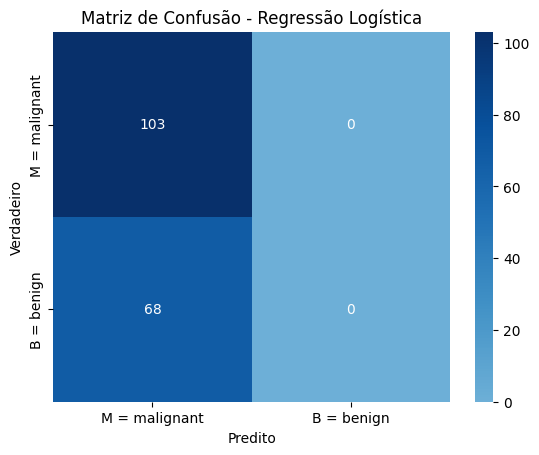


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       0.60      1.00      0.75       103
           M       0.00      0.00      0.00        68

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.38       171
weighted avg       0.36      0.60      0.45       171


-------------------------------------------------------



In [ ]:
# Matriz de confusão para o conjunto de teste
getResults(X_test, y_test, lr_clf, model_name='reglog')

#### **Conjunto de treino**

---



Modelo: Regressão Logística
Acurácia: 0.6397984886649875 



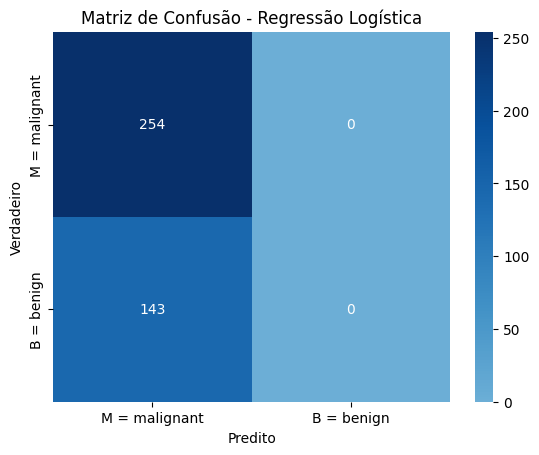


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       0.64      1.00      0.78       254
           M       0.00      0.00      0.00       143

    accuracy                           0.64       397
   macro avg       0.32      0.50      0.39       397
weighted avg       0.41      0.64      0.50       397


-------------------------------------------------------



In [ ]:
# Matriz de confusão para o conjunto de teste
getResults(X_train, y_train, lr_clf, model_name='reglog')

#### **Aplicando Oversampling no conjunto de treino**

---

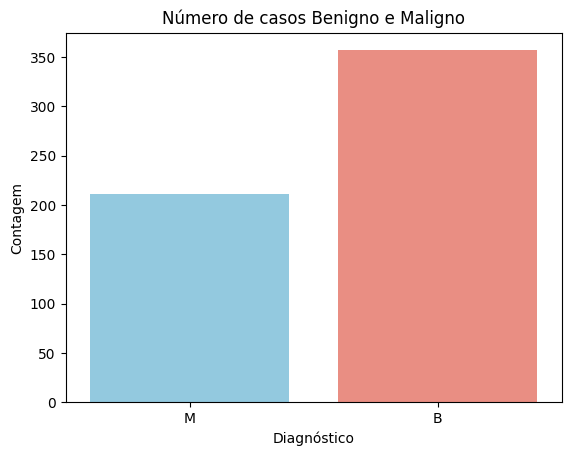

NameError: ignored

In [ ]:

# Visualize o número de casos Benignos e Malignos
showBalance(target="Diagnosis")

# Note que os dados estão relativamente balanceados, então caso haja aplicação de técnicas de
# balanceamento o ganho será pouco.




In [ ]:
mean_accuracy_without_smote = cross_validation(lr_clf, X_train, y_train)
print(mean_accuracy_without_smote)
print()
mean_accuracy_with_smote = cross_validation(lr_clf, X_train, y_train, oversampling=True)
mean_accuracy_with_smote

Accuracy do split 0: 0.65
Accuracy do split 1: 0.6
Accuracy do split 2: 0.75
Accuracy do split 3: 0.75
Accuracy do split 4: 0.625
Accuracy do split 5: 0.625
Accuracy do split 6: 0.65
Accuracy do split 7: 0.5641025641025641
Accuracy do split 8: 0.6410256410256411
Accuracy do split 9: 0.5384615384615384
0.6393589743589744

Accuracy do split 0: 0.65
Accuracy do split 1: 0.4
Accuracy do split 2: 0.25
Accuracy do split 3: 0.25
Accuracy do split 4: 0.375
Accuracy do split 5: 0.375
Accuracy do split 6: 0.35
Accuracy do split 7: 0.4358974358974359
Accuracy do split 8: 0.358974358974359
Accuracy do split 9: 0.46153846153846156


0.39064102564102565

### **Aplicando regressão com pré-processamento**
 Hirperparametros modificados:

In [ ]:
# dados normalizados
train_scaled, test_scaled, y_train_scaled, y_test_scaled = data_preprocess(X, y, df0)


# Transformando em DataFrames
train_scaled_df   = pd.DataFrame(train_scaled, columns=X.columns)
test_scaled_df    =  pd.DataFrame(test_scaled, columns=X.columns)
y_train_scaled_df = pd.DataFrame(y_train_scaled, columns=['Diagnosis'])
y_test_scaled_df  = pd.DataFrame(y_test_scaled, columns=['Diagnosis'])

<ipython-input-13-66b759566096>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


#### **Conjunto de treino**

---



In [ ]:
log = LogisticRegression()
log.fit(train_scaled, y_train_scaled);
score = log.score(train_scaled, y_train_scaled)
print(f'Accuracy no conjunto de treino: {score:.5f}');

Accuracy no conjunto de treino: 0.99244


Modelo: Regressão Logística
Acurácia: 0.9924433249370277 



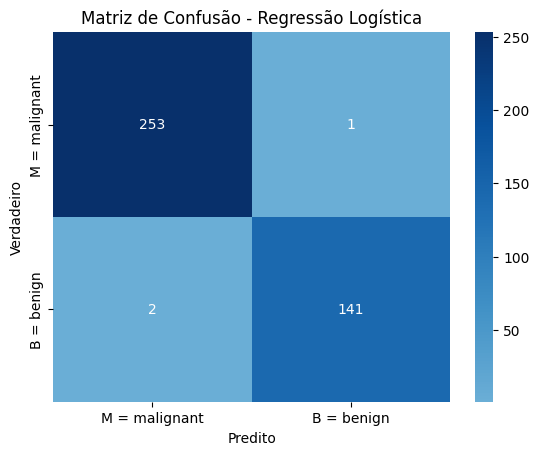


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       0.99      1.00      0.99       254
           M       0.99      0.99      0.99       143

    accuracy                           0.99       397
   macro avg       0.99      0.99      0.99       397
weighted avg       0.99      0.99      0.99       397


-------------------------------------------------------



In [ ]:
getResults(train_scaled, y_train_scaled, log, model_name='reglog')

Avaliação do modelo usando validação cruzada depois de ter aplicado oversampling, normalização dos dados e eliminado variáveis correlacionadas

In [ ]:
# Oversampling
mean_accuracy_without_smote = cross_validation(log, train_scaled_df, y_train_scaled_df)
print(mean_accuracy_without_smote)
print()
mean_accuracy_with_smote = cross_validation(log, train_scaled_df, y_train_scaled_df, oversampling=True)
mean_accuracy_with_smote

Accuracy do split 0: 1.0
Accuracy do split 1: 1.0
Accuracy do split 2: 0.95
Accuracy do split 3: 0.975
Accuracy do split 4: 1.0
Accuracy do split 5: 1.0
Accuracy do split 6: 0.975
Accuracy do split 7: 0.9230769230769231
Accuracy do split 8: 1.0
Accuracy do split 9: 0.9743589743589743
0.9797435897435898

Accuracy do split 0: 1.0
Accuracy do split 1: 0.975
Accuracy do split 2: 0.95
Accuracy do split 3: 0.975
Accuracy do split 4: 1.0
Accuracy do split 5: 1.0
Accuracy do split 6: 0.975
Accuracy do split 7: 0.9487179487179487
Accuracy do split 8: 0.9743589743589743
Accuracy do split 9: 0.9743589743589743


0.9772435897435897

#### **Conjunto de teste**

---



In [ ]:
log = LogisticRegression()
log.fit(train_scaled, y_train_scaled);
score = log.score(test_scaled, y_test_scaled)
print(f'Accuracy no conjunto de teste: {score:.5f}')

Accuracy no conjunto de teste: 0.97076


Modelo: Regressão Logística
Acurácia: 0.9707602339181286 



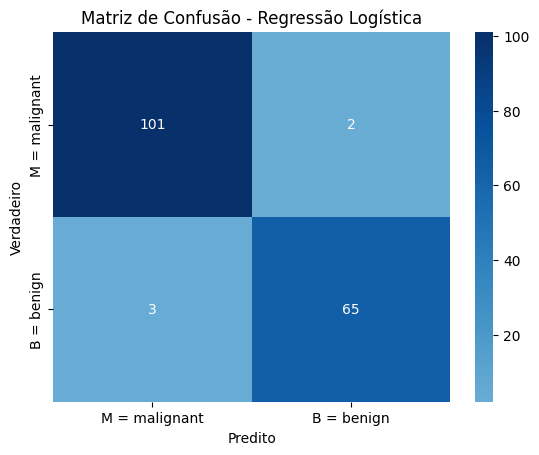


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       0.97      0.98      0.98       103
           M       0.97      0.96      0.96        68

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


-------------------------------------------------------



In [ ]:
getResults(test_scaled, y_test_scaled, log, model_name='reglog')

In [ ]:
# Oversampling
mean_accuracy_without_smote = cross_validation(log, test_scaled_df, y_test_scaled_df)
print(mean_accuracy_without_smote)
print()
mean_accuracy_with_smote = cross_validation(log, test_scaled_df, y_test_scaled_df, oversampling=True)
mean_accuracy_with_smote

Accuracy do split 0: 1.0
Accuracy do split 1: 0.8823529411764706
Accuracy do split 2: 0.8823529411764706
Accuracy do split 3: 0.8823529411764706
Accuracy do split 4: 0.8823529411764706
Accuracy do split 5: 1.0
Accuracy do split 6: 1.0
Accuracy do split 7: 1.0
Accuracy do split 8: 1.0
Accuracy do split 9: 1.0
0.9529411764705882

Accuracy do split 0: 1.0
Accuracy do split 1: 0.8823529411764706
Accuracy do split 2: 0.8823529411764706
Accuracy do split 3: 0.8823529411764706
Accuracy do split 4: 0.8823529411764706
Accuracy do split 5: 1.0
Accuracy do split 6: 1.0
Accuracy do split 7: 1.0
Accuracy do split 8: 1.0
Accuracy do split 9: 0.9411764705882353


0.9470588235294117

## **K-vizinhos**

---




#### **O modelo K-Means**

O K-Means é um algoritmo de aprendizado de máquina não supervisionado que é utilizado para realizar tarefas de agrupamento (clustering) em conjuntos de dados. Seu objetivo é particionar o conjunto de dados em k grupos (clusters) distintos, onde cada grupo contém pontos de dados que são similares entre si e diferentes dos pontos de dados em outros grupos.

**Funcionamento do K-Means:**

1. **Inicialização:** O algoritmo começa selecionando aleatoriamente k pontos como os centroides iniciais dos clusters.

2. **Atribuição dos pontos:** Cada ponto de dado é atribuído ao cluster cujo centroide está mais próximo, com base na distância euclidiana.

3. **Atualização dos centroides:** Os centroides de cada cluster são recalculados para serem a média dos pontos atribuídos a esse cluster.

4. **Repetição:** Os passos 2 e 3 são repetidos até que ocorra convergência, ou seja, quando os centroides não mudam significativamente entre iterações.

5. **Convergência:** Quando a convergência é atingida, os clusters estão formados e os pontos de dados estão agrupados de acordo com os centroides.

**Fórmula da Distância Euclidiana:**

A distância euclidiana é utilizada para medir a proximidade entre os pontos de dados e os centroides dos clusters. Seja \(X_i\) o ponto de dados e \(C_j\) o centroide do cluster j, a distância euclidiana \(d(X_i, C_j)\) é calculada da seguinte forma:

$$ d(X_i, C_j) = \sqrt{\sum_{k=1}^{n} (X_{i,k} - C_{j,k})^2} $$

onde:
- \(n\) é o número de dimensões (atributos) do conjunto de dados.
- \(X_{i,k}\) é o valor do atributo k do ponto de dados \(X_i\).
- \(C_{j,k}\) é o valor do atributo k do centroide \(C_j\).

**Métricas de Avaliação:**

Ao contrário da árvore de decisão, o K-Means é um algoritmo não supervisionado, o que significa que não possui um rótulo de classe conhecido para avaliar seu desempenho diretamente. Portanto, métricas como acurácia não são aplicáveis no contexto do K-Means.

As métricas comuns para avaliar a qualidade dos agrupamentos gerados pelo K-Means incluem:

1. **Inércia:** A inércia é a soma das distâncias ao quadrado de cada ponto de dado ao centroide do cluster ao qual ele foi atribuído. O objetivo é minimizar a inércia, ou seja, encontrar clusters que tenham pontos próximos ao seu centroide.

2. **Coeficiente de Silhueta:** O coeficiente de silhueta é uma medida que varia de -1 a 1 e fornece uma indicação de quão bem os pontos estão agrupados. Valores mais próximos de 1 indicam que os pontos estão bem agrupados, enquanto valores próximos de -1 indicam que os pontos podem ter sido atribuídos ao cluster errado.

3. **Índice Davies-Bouldin (DBI):** O índice DBI mede a dispersão entre os clusters e a separação entre eles. Quanto menor o valor do DBI, melhor a qualidade dos clusters.

Essas métricas podem ser utilizadas para avaliar o desempenho do algoritmo K-Means e selecionar o valor ideal de k (número de clusters) através de técnicas como o método do cotovelo (Elbow Method) ou o índice de validação externa.